## Gerekli Kütüphaneleri Import Etme


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
import sklearn.metrics as mt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("../input/insurance/insurance.csv")
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Keşifsel Veri Analizi (EDA)



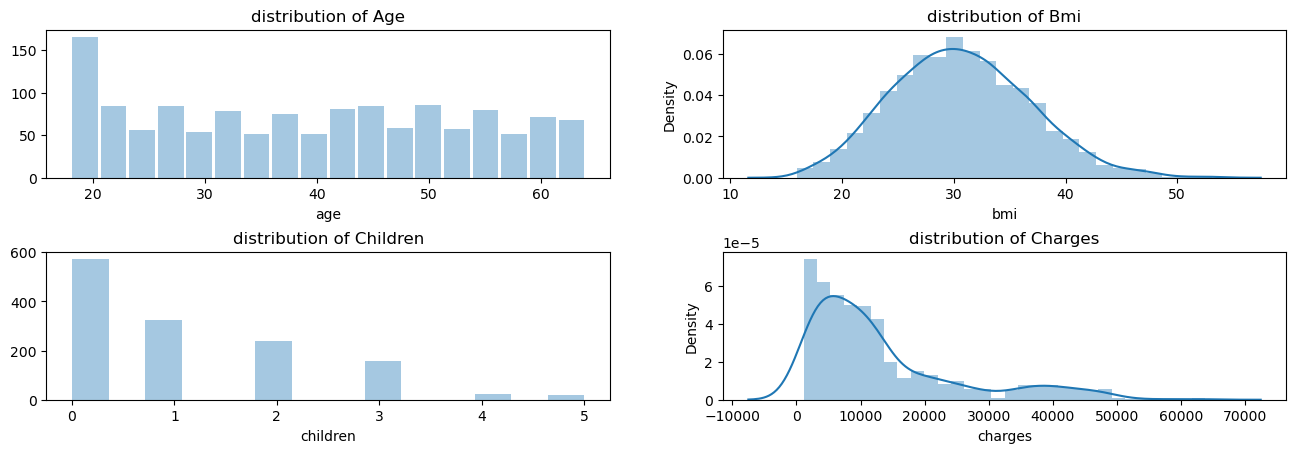

In [ ]:
plt.figure(figsize=(14,5))
plt.subplots_adjust(top=0.85, hspace=0.5)


plt.subplot(2,2,2)
plt.title('distribution of Bmi')
sns.distplot(df.bmi, kde=True);
plt.subplot(2,2,1)
plt.title('distribution of Age')
sns.distplot(df.age, kde=False,  hist_kws={'rwidth': 0.9}, bins=18);
plt.subplot(2,2,3)
plt.title('distribution of Children')
sns.distplot(df.children, kde=False);
plt.subplot(2,2,4)
plt.title('distribution of Charges')
sns.distplot(df.charges, kde=True);


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801




      Age(yaş) üniform bir dağılım gösteriyor.
      Charges özniteli sağa çarpık. Aykırı gözlemler mevcut.
        BMI normal dağılım göstermiş



age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64


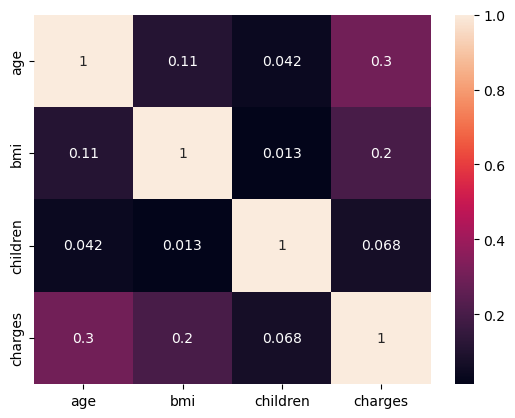

In [ ]:
# Korelasyon incelemesi
sns.heatmap(df.corr(), annot=True)
print(df.corr()['charges'])

Bağımsız değişkenlerimiz arasında doğrusal bağlantı problemi yaratabilecek bir ilişki görünmüyor.

'Charges' bizim hedef değişkenimiz bu yüzden diğer sayısal öznitelikler ile arasındaki korelasyona baktık.

Age ve BMI ile düşük pozitif korelasyon var.




In [ ]:
plt.figure(figsize=(13,7))
plt.title('Relationship Between “Smoker” and “Charges”')
sns.barplot(data=df, x=df['smoker'], y=df['charges'], hue='region');


#Verilen incelemeler

df.groupby("smoker")["age","charges"].describe().T

df.groupby("region")["charges"].describe().T

df.groupby("bmi")["sex"].describe().T

df.groupby("age")["bmi"].describe().T

df.groupby("bmi")["children"].describe().T

df.groupby("bmi")["charges"].describe().T

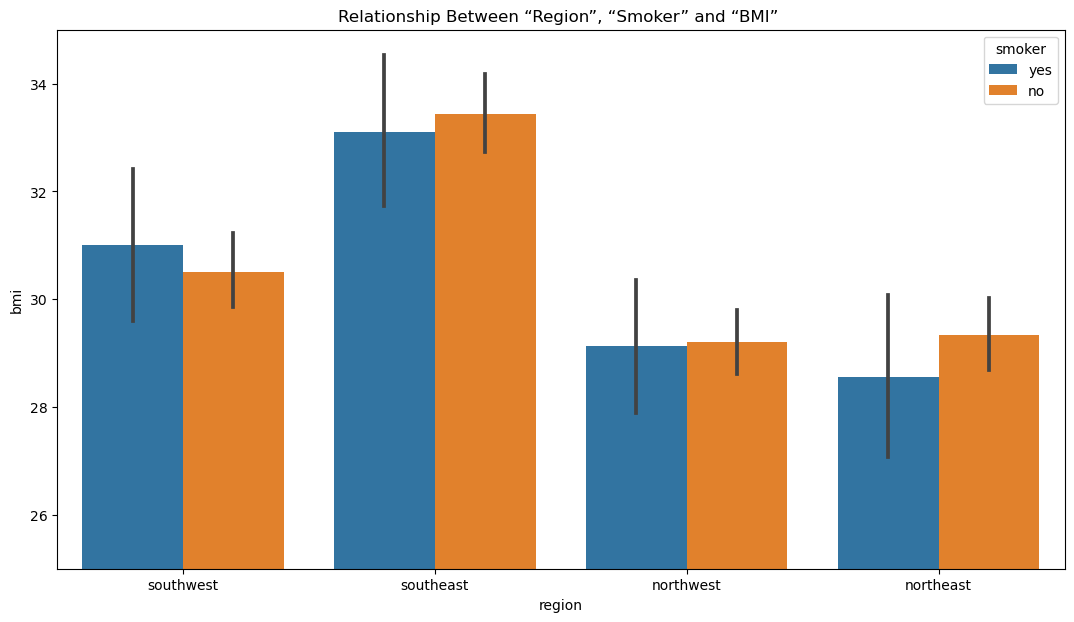

In [ ]:
plt.figure(figsize=(13,7))
plt.title('Relationship Between “Region”, “Smoker” and “BMI” ')
sns.barplot(data=df, x=df['region'], y=df['bmi'], hue='smoker');
plt.ylim(25,35);


## Veri Ön İşlenmesi (Data Preprocessing)

In [ ]:
# age ve bmi değişkenlerinde yeni kategorik değişken çıkartma
age_cat = ["0-18", "18-30", "30-45", "45-60", "60+"]
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 45, 60, 99], labels=age_cat, right=False)
bmi_cat = ['Underweight', 'Normal', 'Overweight', 'Obese (Class I)', 'Obese (Class II)',
           'Obese (Class III)']
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 99], labels=bmi_cat, right=False)
# Kategorik değişkenlerin one-hot dönüşümleri

df = pd.get_dummies(df,
                            columns=['sex','smoker','region', 'age_group','bmi_group'],
                            prefix=['sex','smoker','region', 'age_group','bmi_group'],
                            drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_18-30,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese (Class I),bmi_group_Obese (Class II),bmi_group_Obese (Class III)
0,19,27.900,0,16884.92400,0,1,0,0,1,1,0,0,0,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
# Verinin train ve test olarak ayrılması(test=0.2, eğitim=0.8)
y = df['charges']
X = df.drop(columns='charges', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection

In [ ]:
# Çapraz Geçerlilik
def crossval(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    forest_reg_rmse_scores = np.sqrt(-scores)
    return forest_reg_rmse_scores.mean()

# Model Başarı Fonksiyonu
def basari(gercek, tahmin):
    rmse = mt.mean_squared_error(gercek,tahmin, squared=False)
    r2 = mt.r2_score(gercek, tahmin)
    return[rmse,r2]


In [ ]:
# Lasso Regresyon
lasso = Lasso()
lasso_model= lasso.fit(X_train, y_train)
lasso_tahmin = lasso_model.predict(X_test)

# Linear regresyon
lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)
linear_tahmin = linear_model.predict(X_test)

# Ridge Regresyon
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_tahmin = ridge_model.predict(X_test)
# ElasticNet Regresyon
elas = ElasticNet()
elas_model = elas.fit(X_train, y_train)
elas_tahmin = elas_model.predict(X_test)

# Decision Tree Regresyon
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model = tree_regressor.fit(X_train, y_train)
tree_tahmin = tree_model.predict(X_test)

# Random Forest Regresyon
random_for = RandomForestRegressor(random_state=42)
Forest_model = random_for.fit(X_train,y_train)
RandomForest_tahmin = Forest_model.predict(X_test)


In [ ]:
results = [['Linear Model', basari(y_test,linear_tahmin)[0],basari(y_test,linear_tahmin)[1],crossval(linear_model)],
           ['Ridge Model', basari(y_test,ridge_tahmin)[0],basari(y_test,ridge_tahmin)[1],crossval(ridge_model)],
           ['Lasso Model', basari(y_test,lasso_tahmin)[0],basari(y_test,lasso_tahmin)[1],crossval(lasso_model)],
           ['ElasticNet Model', basari(y_test,elas_tahmin)[0],basari(y_test,elas_tahmin)[1],crossval(elas_model)],
           ['Random Forest Model', basari(y_test, RandomForest_tahmin)[0], basari(y_test,RandomForest_tahmin)[1], crossval(Forest_model)],
           ['Decision Tree Model', basari(y_test,tree_tahmin)[0],basari(y_test,tree_tahmin)[1],crossval(tree_model)]]

columns = ['Model', 'RMSE', 'R2', 'Doğrulama(cv)']

pd.set_option('display.float_format', '{:.3f}'.format)
results = pd.DataFrame(data=results,columns=columns)
results


,Model,RMSE,R2,Doğrulama(cv)
0,Linear Model,5795.377,0.784,6063.309
1,Ridge Model,5763.996,0.786,6065.861
2,Lasso Model,5783.119,0.785,6063.222
3,ElasticNet Model,9493.610,0.419,9440.048
4,Random Forest Model,4617.474,0.863,5011.246
5,Decision Tree Model,4776.261,0.853,4798.195


# **Random Forest modeli ile daha düşük bir rmse değeri ve yüksek bir R2 değeri aldık. En uygun model Random Forest.**

## Hiperparametre Optimizasyonu

In [ ]:
# Random Forest için hiperparametre ayarı
forest_param_grid = [
    { "n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, 11] },
    { "bootstrap": [False], "n_estimators": [3, 10], "max_depth": [3, 5, 7, 9, 11]}
]
forest_reg = RandomForestRegressor(random_state=42)

forest_grid_search = GridSearchCV(forest_reg, forest_param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X, y)
print("En iyi hiperparametre değerleri:", forest_grid_search.best_params_)

En iyi hiperparametre değerleri: {'max_depth': 5, 'n_estimators': 40}


In [ ]:
random_for = RandomForestRegressor(random_state=42, max_depth=5,n_estimators = 40)
Forest_model = random_for.fit(X_train,y_train)
RandomForest_tahmin = Forest_model.predict(X_test)
final_basari= basari(y_test, RandomForest_tahmin)

## Model Performansını Değerlendirme / Model Evaluation

In [ ]:
test_veriler = y_test
tahmin_veriler = RandomForest_tahmin
x_degerleri = np.arange(len(test_veriler))

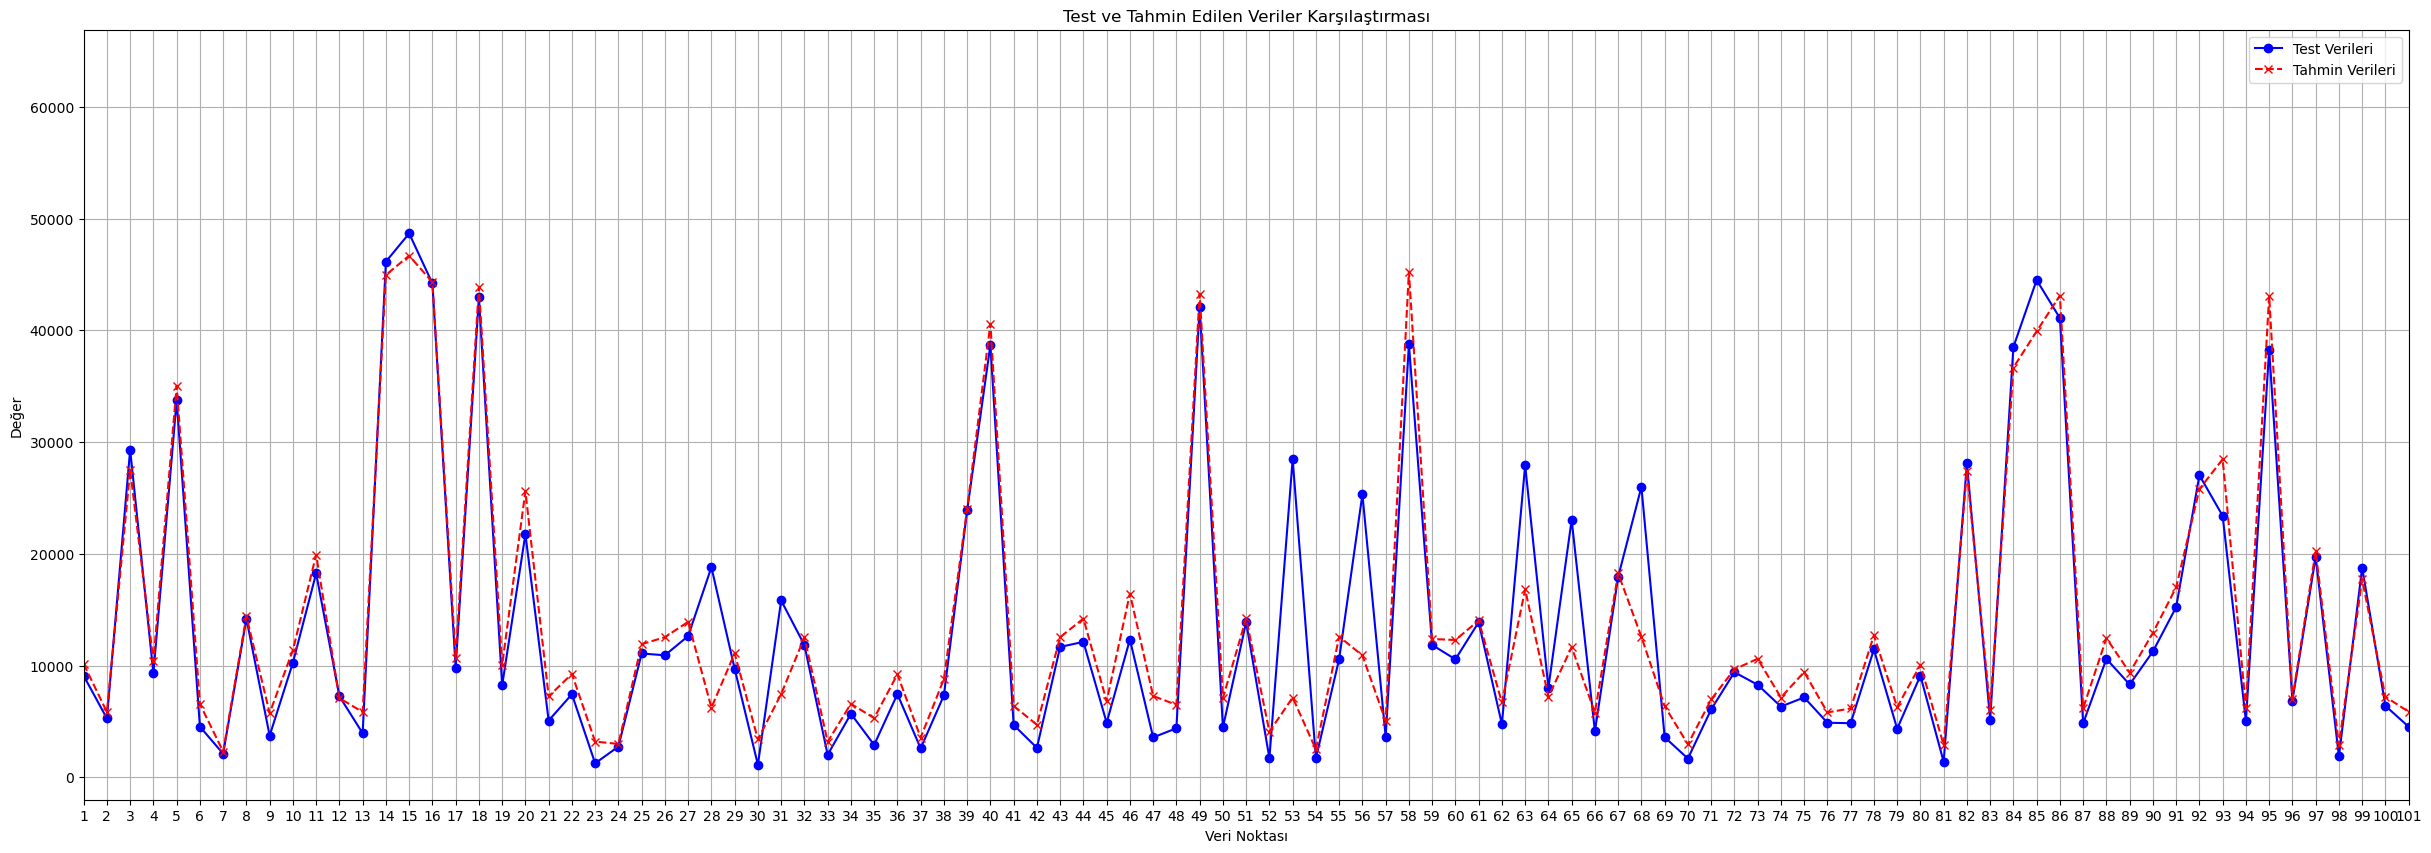

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(x_degerleri, test_veriler, marker='o', color='blue', label='Test Verileri')
plt.plot(x_degerleri, tahmin_veriler, marker='x', color='red', linestyle='dashed', label='Tahmin Verileri')
plt.xticks(x_degerleri, x_degerleri + 1)  # x ekseni
plt.xlabel('Veri Noktası')
plt.ylabel('Değer')
plt.title('Test ve Tahmin Edilen Veriler Karşılaştırması')
plt.xlim(0,100)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f'RMSE: {final_basari[0]}\nR2 Skor: {final_basari[1]}')

RMSE: 4436.725139959536
R2 Skor: 0.8732065004435026
